In [ ]:
# imports
!pip install mirdata
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import mirdata
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, dataset_name, split_strings, labels_dict, n_mels=32, hop_length=2048*2, n_fft=2048*2, fmax=8000, dur=4.9):
        self.dataset = mirdata.initialize(dataset_name)
        self.dataset.download(force_overwrite=True)
        self.labels_dict = labels_dict
        self.split_strings = split_strings # the guitar strings that will be used by the dataloader
        # filter out the strings that should not be
        # in the dataset split
        # also filter out any effects not featured in
        # labels dict
        self.track_ids = []
        for t in self.dataset.track_ids:
          string_number = t # your code here
          if self.dataset.track(t).effect_type in labels_dict and string_number in self.split_strings:
            # your code here
        self.n_mels = n_mels
        self.fmax = fmax
        self.dur=dur
        self.hop_length=hop_length
        self.n_fft = n_fft

    def __getitem__(self, index):
        # write the getitem method

        # load the audio signal
        x, fs = # your code here

        # get the effect type
        effect_type = self.dataset.track(# your code here

        # compute the melspectrogram
        S = librosa.feature.melspectrogram(# your code here

        # convert to dB
        S_dB = librosa.power_to_db(S, ref=np.max)

        # standardize the individual spectrogram with its statistics across time and frequency axes
        S_dB -= np.mean(# your code here
        S_dB /= np.std(# your code here

        # return the flattened spectrogram and the integer that identifies the effect
        return # your code here

    def __len__(self):
        return len(self.track_ids)

DATASET_NAME = 'egfxset'
LABELS_DICT = {'modulation':0,'reverb':1,} #'distortion':2, 'modulation':3, 'None':4}
TRAIN_STRINGS = [0,1,2,3,4,6]
TEST_STRINGS = [5]

batch_size = 32

# Instantiate training and test data
train_data = Data(DATASET_NAME, TRAIN_STRINGS, LABELS_DICT)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(DATASET_NAME, TEST_STRINGS, LABELS_DICT)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

In [ ]:
import torch
from torch import nn
from torch import optim

input_dim = 1856
hidden_dim = 64
output_dim = len(LABELS_DICT)

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(# your code here
        self.layer_2 = nn.Linear(# your code here
        # self.layer_3
        # self.layer_4
        # ...

    def forward(self, x):
        # write the forward method
        x = # your code here
        x = # your code here
        return x

model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

In [ ]:
# define the learning rate and optimizer
learning_rate = 0.01
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# write the training loop
import torch.nn.functional as F
num_epochs = 100
loss_values = []

for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y)
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print("Training Complete")

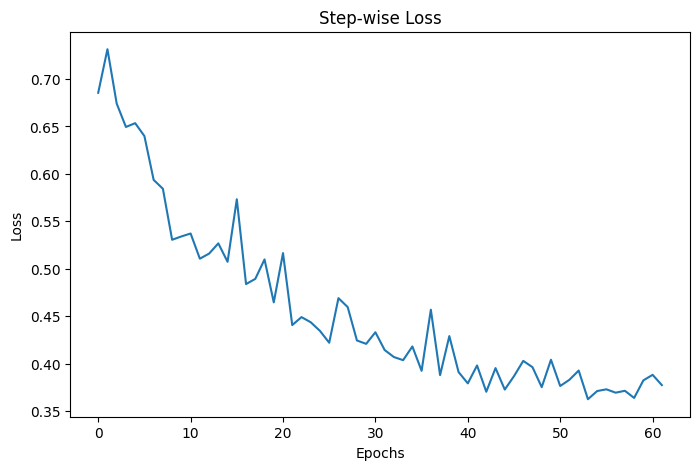

In [ ]:
# plot the loss
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
# evaluate your model
"""
We're not training so we don't need to calculate the gradients for our outputs
"""
y_pred = []
y_test = []
total = 0
correct = 0
with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        y_pred = np.argmax(outputs,axis=-1)
        total += y.size(0)
        correct += np.sum((y_pred == y).numpy())

print(f'Accuracy of the network on the test instances: {100 * correct // total}%')
print(y_zeros)

Accuracy of the network on the test instances: 90%
345
